In [1]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# 1

In [2]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [3]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)


In [4]:

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [5]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [6]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [7]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
# del autoencoder

In [9]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.3835 - val_loss: 0.1834
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1756 - val_loss: 0.1526
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1483 - val_loss: 0.1331
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1311 - val_loss: 0.1210
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1203 - val_loss: 0.1129
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1124 - val_loss: 0.1070
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1069 - val_loss: 0.1025
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1029 - val_loss: 0.0992
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0997 - val_loss: 0.0971
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0977 - val_loss: 0.0954


In [10]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


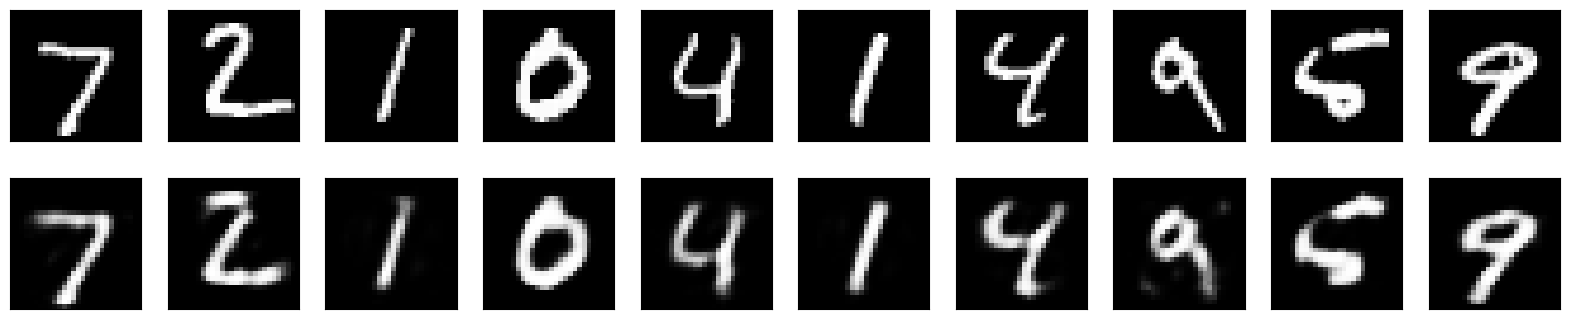

In [11]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

 # Deep AutoEncoder

In [12]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(32, activation='relu')(encoded)


decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [13]:
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]


In [14]:
decoder = Model(encoded_input,  ( (decoder_layer2(decoder_layer1(encoded_input))) ) )

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.3272 - val_loss: 0.1533
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1436 - val_loss: 0.1209
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1190 - val_loss: 0.1102
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1099 - val_loss: 0.1042
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1047 - val_loss: 0.1010
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1013 - val_loss: 0.0980
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0984 - val_loss: 0.0955
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0962 - val_loss: 0.0944
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0952 - val_loss: 0.0932
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0941 - val_loss: 0.0925


In [15]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


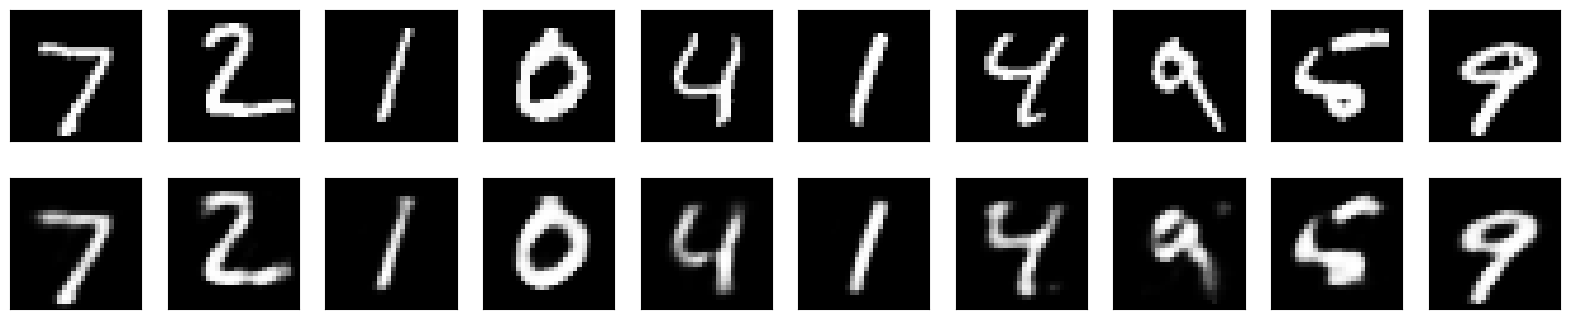

In [16]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 2

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3812 - val_loss: 0.1891
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1800 - val_loss: 0.1537
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1493 - val_loss: 0.1337
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1315 - val_loss: 0.1213
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1203 - val_loss: 0.1131
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


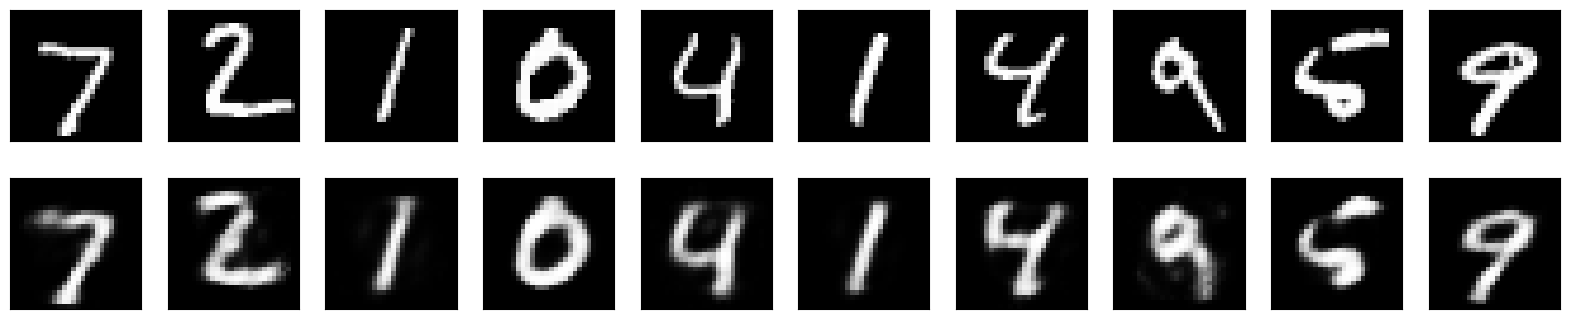

In [23]:
# epoch = 5
encoding_dim = 32
input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, (decoder_layer(encoded_input)))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

With 5 epochs, the autoencoder seems to predict the images relativly well. The predicted images are more blurry than the original. Moreover it appears that the first 4 image may be predicted as a 9 and the first 9 seems like it may lead to a wrong preciction. The edges are not sharp in the predicted images so the numbers that are more ambigious may lead to wrong predictions.

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3844 - val_loss: 0.1925
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1820 - val_loss: 0.1532
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1482 - val_loss: 0.1325
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1304 - val_loss: 0.1208
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1199 - val_loss: 0.1128
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1126 - val_loss: 0.1071
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1072 - val_loss: 0.1030
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1034 - val_loss: 0.0999
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1004 - val_loss: 0.0976
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0983 - val_loss: 0.0959
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


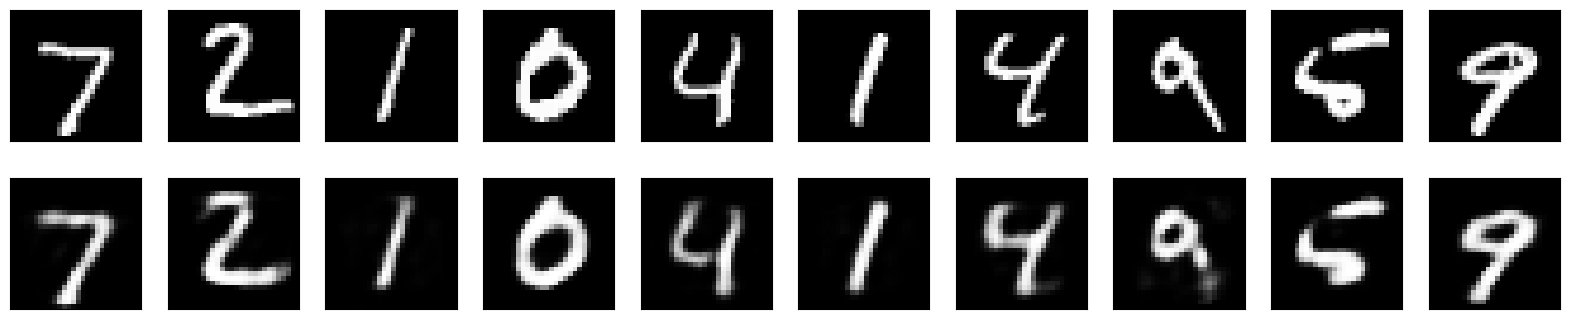

In [24]:
# epoch = 10
encoding_dim = 32
input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input,  (decoder_layer(encoded_input)))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

With 10 epochs some many images are notably sharper than with 5 epochs. Specifically 0 and the second 1 are much sharper. Also the 1st 4 while still blurry becomes more easily identifyable when compared to 5 epochs. 1st 9 and 5 appear to be slighly worse than 5 epochs. The 5 is the most challenging prediction since it is very ambigious and has more compact features when compared to the other numbers.

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.3819 - val_loss: 0.1920
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1816 - val_loss: 0.1538
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1501 - val_loss: 0.1337
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1313 - val_loss: 0.1206
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1195 - val_loss: 0.1122
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1120 - val_loss: 0.1069
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1068 - val_loss: 0.1028
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1031 - val_loss: 0.0999
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1004 - val_loss: 0.0976
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0983 - val_loss: 0.0959
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0967 - val_loss: 0.0949
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms

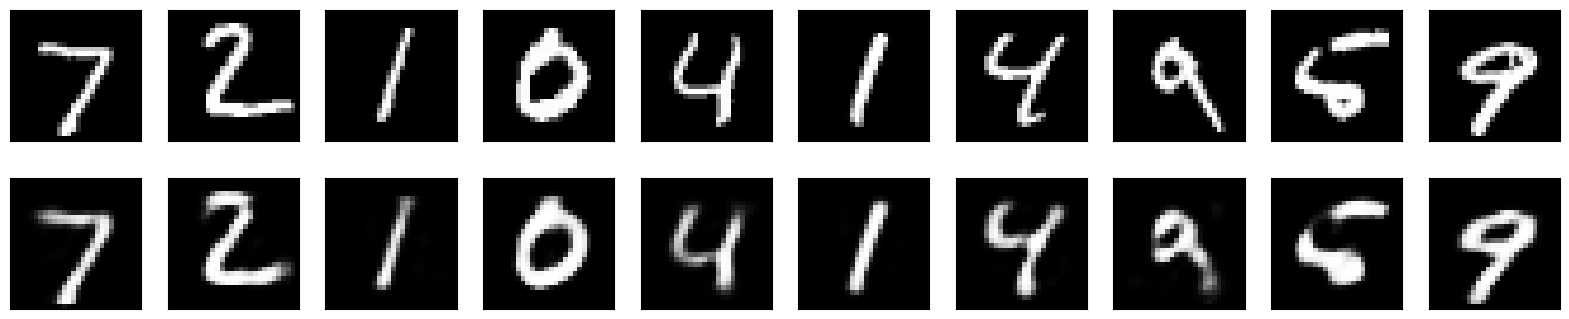

In [25]:
# epoch = 20
encoding_dim = 32
input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input,  (decoder_layer(encoded_input)))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

20 epochs result is more sharp and clear predictions when compared to 10. 7 and 2 and 2nd 9 is more clear. Some are still blurry such as the 4s. 1st 9 and 5 are still difficuilt to predict. 9 seems even more blurry than epoch 10. 5 may also be predicted worse.

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3900 - val_loss: 0.1893
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1793 - val_loss: 0.1522
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1482 - val_loss: 0.1332
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1313 - val_loss: 0.1215
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1206 - val_loss: 0.1132
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1130 - val_loss: 0.1074
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1077 - val_loss: 0.1031
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1036 - val_loss: 0.0999
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1006 - val_loss: 0.0975
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0982 - val_loss: 0.0958
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0969 - val_loss: 0.0947
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9m

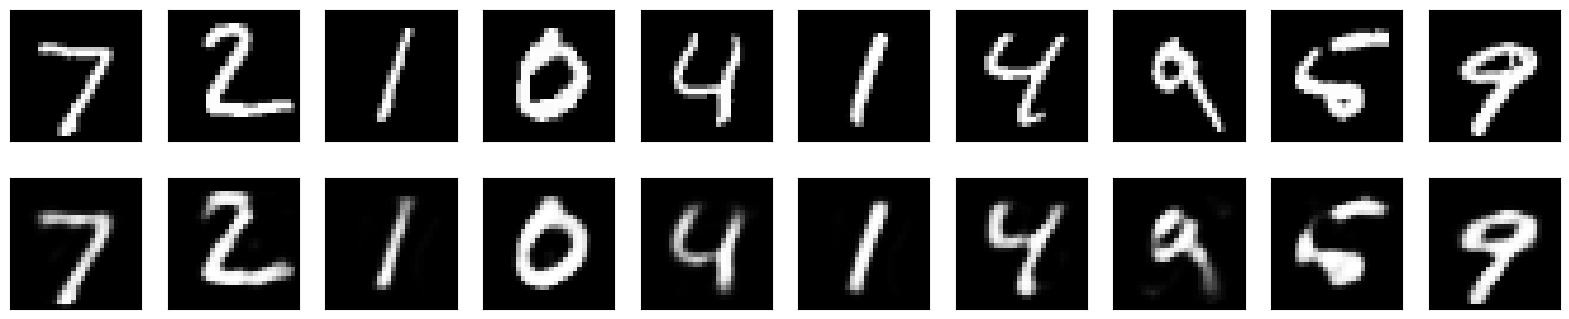

In [26]:
# epoch = 30
encoding_dim = 32
input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input,  (decoder_layer(encoded_input)))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

30 epochs is very similar to 20. The same issues are present. There may be slight clarity improvements in majority of numbers but 1st 9 and 5 are still not predicted well. It appears there are significant diminising returns after about 20 epochs so far.

Epoch 1/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3826 - val_loss: 0.1887
Epoch 2/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1792 - val_loss: 0.1526
Epoch 3/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1484 - val_loss: 0.1323
Epoch 4/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1303 - val_loss: 0.1200
Epoch 5/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1193 - val_loss: 0.1118
Epoch 6/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1114 - val_loss: 0.1064
Epoch 7/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1067 - val_loss: 0.1026
Epoch 8/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1032 - val_loss: 0.0995
Epoch 9/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1003 - val_loss: 0.0973
Epoch 10/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0980 - val_loss: 0.0957
Epoch 11/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0967 - val_loss: 0.0945
Epoch 12/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms

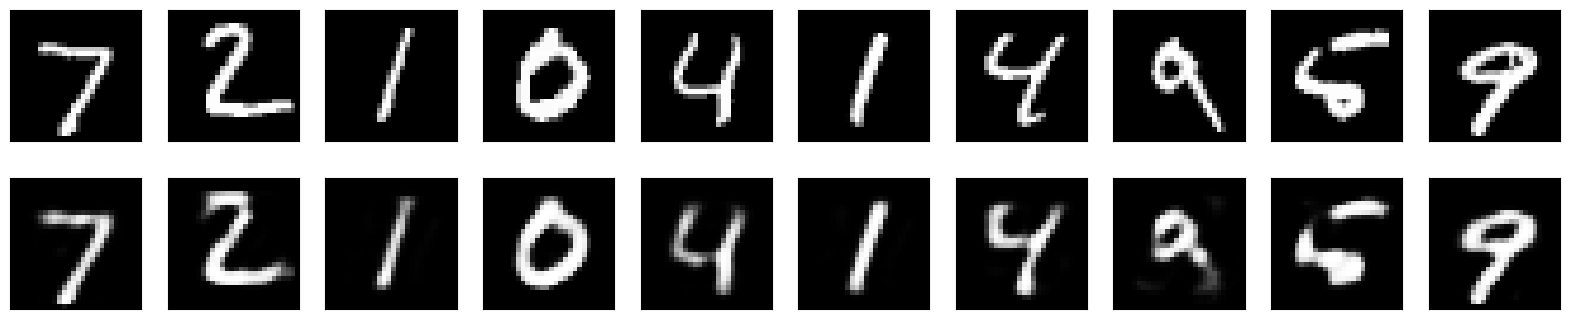

In [27]:
# epoch = 40
input_img = Input(shape=(784,))
encoding_dim = 32
input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input,  (decoder_layer(encoded_input)))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=40,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

40 epochs is very similar to 30 and 20. 1st 9 and 5. It is also predicted in the same manner as 20 whereas 5 epochs for example has different structure in the prediction, such as the tail of the 9. This further supports that with this model significant diminishing returns after 20 epochs.

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3871 - val_loss: 0.1895
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1804 - val_loss: 0.1542
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1493 - val_loss: 0.1332
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1308 - val_loss: 0.1210
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1200 - val_loss: 0.1130
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1129 - val_loss: 0.1072
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1075 - val_loss: 0.1031
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1036 - val_loss: 0.0998
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1004 - val_loss: 0.0973
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0984 - val_loss: 0.0956
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0965 - val_loss: 0.0945
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/s

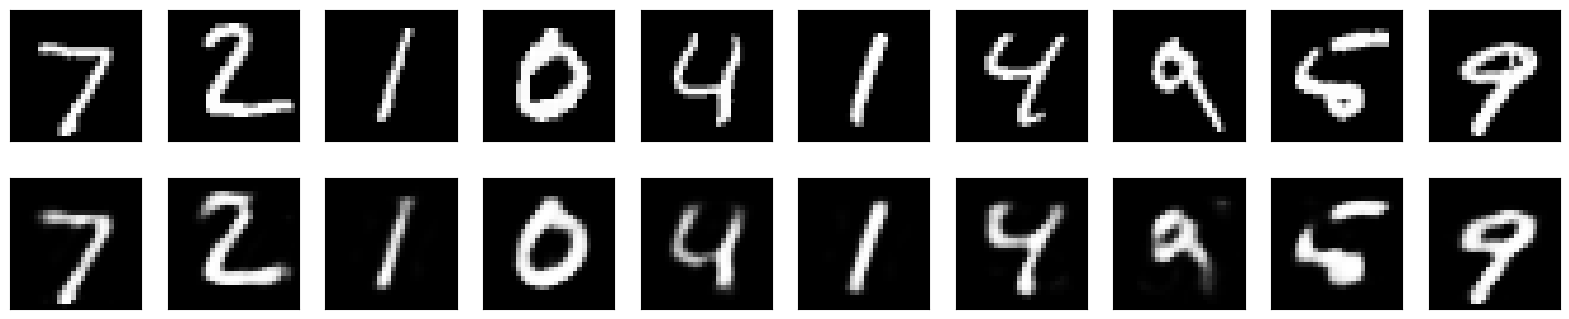

In [28]:
# epoch = 50
encoding_dim = 32
input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input,  (decoder_layer(encoded_input)))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

50 epochs continues to slighly improve clarity tbut the shape of 1st 9 and 5 is still the same but slighly less blurry. It appears that the structure is already determined as the model has converged but adding more epochs slighly increases clarity, but it is likley not worth the computational cost for this example.

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3821 - val_loss: 0.1928
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1827 - val_loss: 0.1549
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1505 - val_loss: 0.1345
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1325 - val_loss: 0.1220
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1210 - val_loss: 0.1139
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1138 - val_loss: 0.1083
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1089 - val_loss: 0.1042
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1046 - val_loss: 0.1011
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1015 - val_loss: 0.0986
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0997 - val_loss: 0.0970
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0980 - val_loss: 0.0959
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━

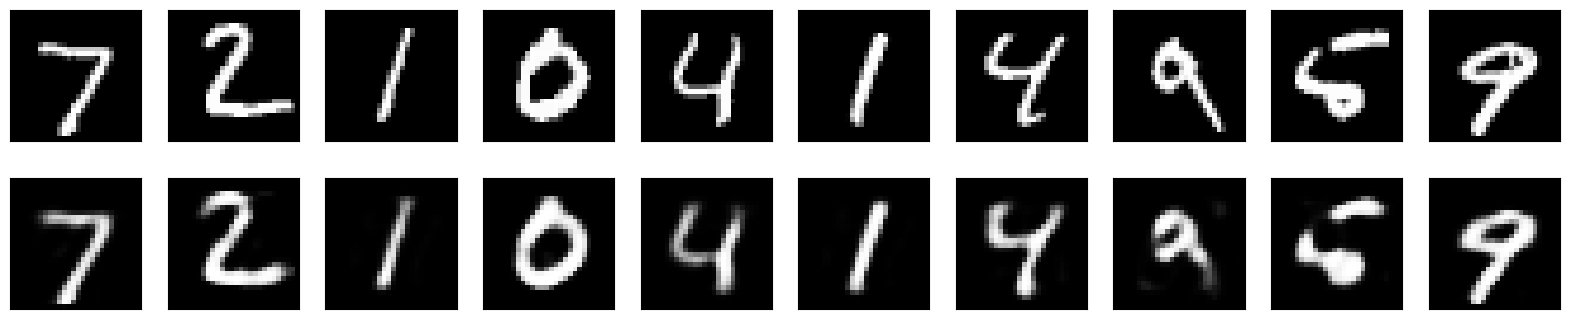

In [29]:
# epoch = 100
encoding_dim = 32
input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input,  (decoder_layer(encoded_input)))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

For 100 epochs, the same trend occurs. Some images are slighly more clear but the structures remain the same which is an issue for 1st 9 and 5. The added computational cost does not appear to justify the slight clarity improvements from 20. To get a better result for the autoencoder different parameters should be tuned such as how deep the model is.

# 3

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.3248 - val_loss: 0.1513
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1424 - val_loss: 0.1196
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1175 - val_loss: 0.1081
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1079 - val_loss: 0.1034
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1034 - val_loss: 0.0997
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1004 - val_loss: 0.0977
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0986 - val_loss: 0.0956
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0967 - val_loss: 0.0947
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0954 - val_loss: 0.0931
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0939 - val_loss: 0.0924
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0929 - val_loss: 0.0914
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

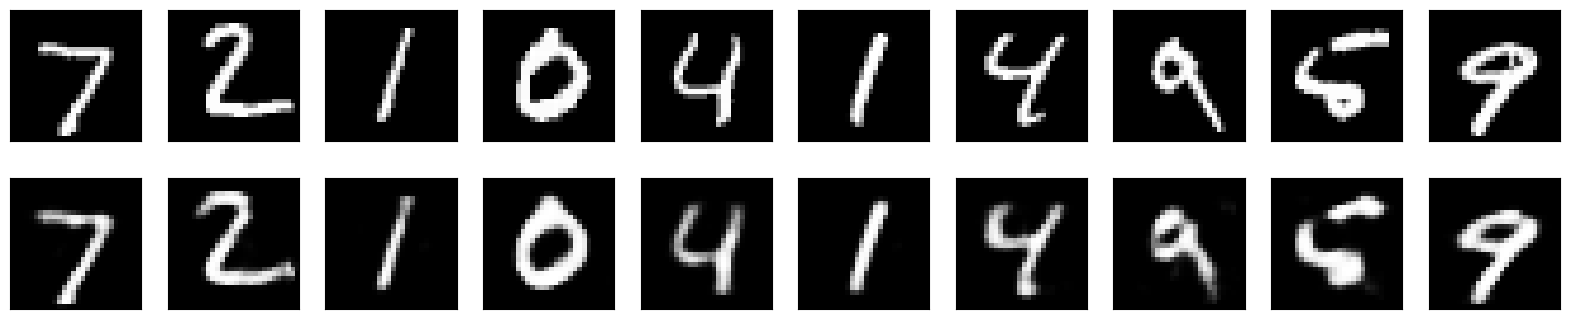

In [30]:
# 2 hidden layers
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(32, activation='relu')(encoded)


decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]

decoder = Model(encoded_input,  ((decoder_layer2(decoder_layer1(encoded_input)))))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

With 2 hidden layers, the predictions are slightly more sharp and clear than one hidden layer but the structures remain very similar. However it is important to test multiple hidden layers because that will most likley have a more significant effect than changing the epochs or batch size after a point.

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.3315 - val_loss: 0.1670
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1582 - val_loss: 0.1365
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1341 - val_loss: 0.1250
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1247 - val_loss: 0.1178
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1182 - val_loss: 0.1140
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1145 - val_loss: 0.1106
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.1114 - val_loss: 0.1079
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1089 - val_loss: 0.1058
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1063 - val_loss: 0.1034
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1042 - val_loss: 0.1016
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.1022 - val_loss: 0.1001
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

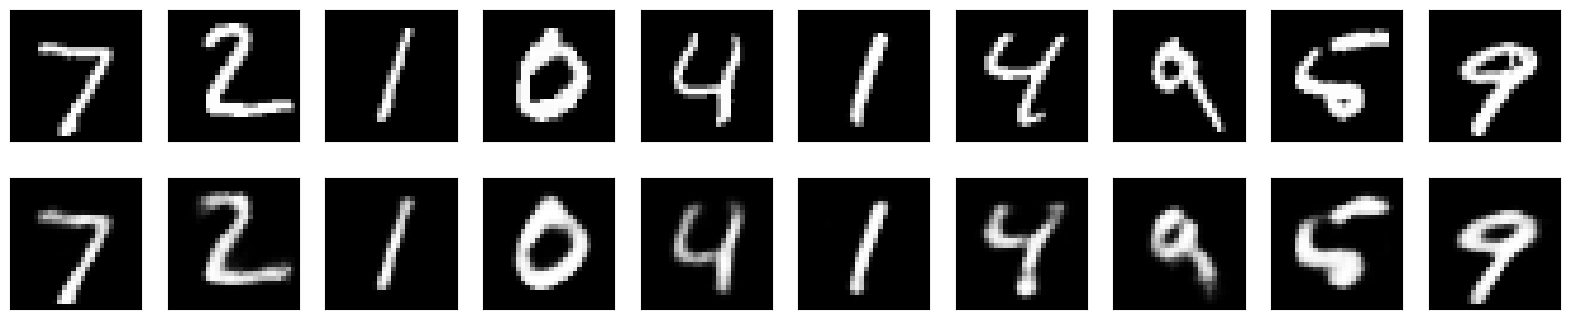

In [34]:
# 3 hidden layers
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[-3]
decoder_layer2 = autoencoder.layers[-2]
decoder_layer3 = autoencoder.layers[-1]

decoder = Model(encoded_input,  (decoder_layer3(decoder_layer2(decoder_layer1(encoded_input)))))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

There does not seem to be a significant change from 3 hidden layers from 2 hidden layers. The second 4 actually seems slighly less clear. The gap on the top of the 5 appears to be a little more accurate with 3 hidden layers.

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.3212 - val_loss: 0.1626
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.1538 - val_loss: 0.1332
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1298 - val_loss: 0.1201
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.1193 - val_loss: 0.1134
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.1134 - val_loss: 0.1084
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1087 - val_loss: 0.1052
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 0.1058 - val_loss: 0.1024
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.1031 - val_loss: 0.1004
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1008 - val_loss: 0.0990
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.0994 - val_loss: 0.0969
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.0973 - val_loss: 0.0957
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━

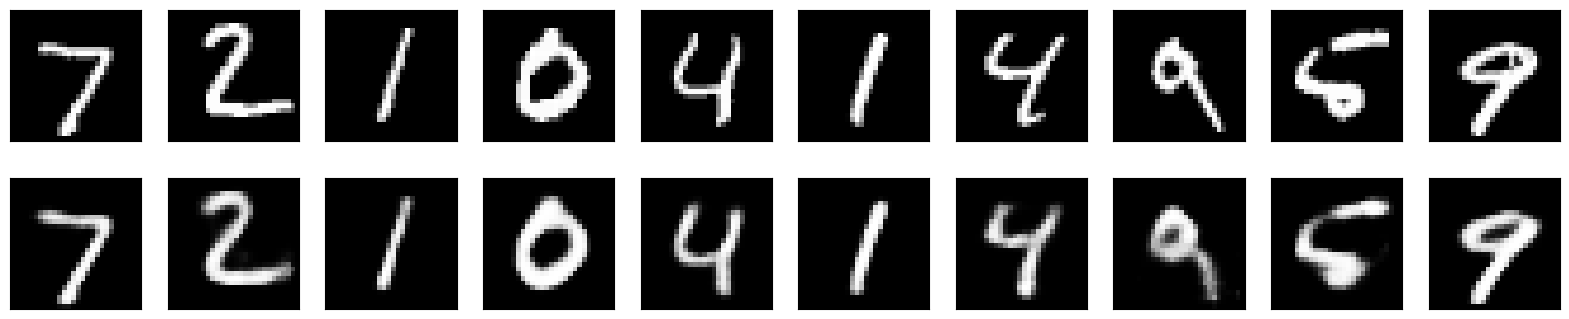

In [35]:
# 4 hidden layers
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(256, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[-4]
decoder_layer2 = autoencoder.layers[-3]
decoder_layer3 = autoencoder.layers[-2]
decoder_layer4 = autoencoder.layers[-1]

decoder = Model(encoded_input,  (decoder_layer4(decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

4 hidden layers result in more clear and sharp images in some cases compared to 3. With 4 hidden layers the structures of 1st 9 and 5 are starting to change and be more noticably accurate.

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.3118 - val_loss: 0.1788
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.1651 - val_loss: 0.1425
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.1399 - val_loss: 0.1308
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - loss: 0.1288 - val_loss: 0.1219
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.1209 - val_loss: 0.1166
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.1156 - val_loss: 0.1116
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - loss: 0.1111 - val_loss: 0.1081
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.1069 - val_loss: 0.1046
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.1044 - val_loss: 0.1024
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.1018 - val_loss: 0.1015
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0997 - val_loss: 0.0986
Epoch 12/20
235/235 ━━━━━━━━━━

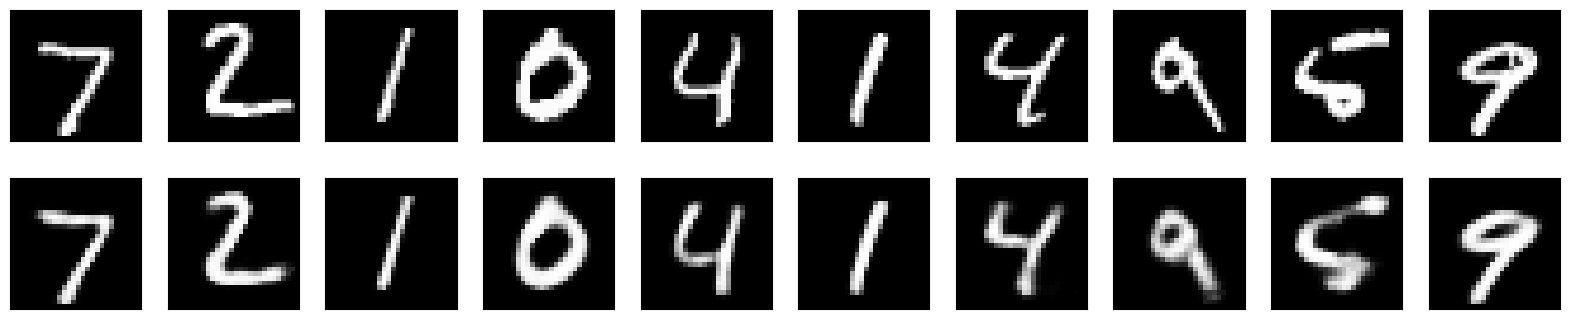

In [36]:
# 5 encoding layers
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[-5]
decoder_layer2 = autoencoder.layers[-4]
decoder_layer3 = autoencoder.layers[-3]
decoder_layer4 = autoencoder.layers[-2]
decoder_layer5 = autoencoder.layers[-1]

decoder = Model(encoded_input,  (decoder_layer5(decoder_layer4(decoder_layer3(decoder_layer2(decoder_layer1(encoded_input)))))))


autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

5 hidden layers as expected produces the clearest, sharpest and most accurate predictions. While blurry still, the 1st 9 and 5 have significantly improved structure. However there is a large computational cost increase. Therefore it is important to understand the tradeoffs of accuracy and computational cost. Some instances the increased cost may be worth it because accuracy is very important for the model, while other models need to be faster and can handle less accuracy. It is important to test a variety of parameters. If more hidden layers are added the model may overfit.

# 4

# 4a / 4b



In [101]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

images = []
test_images = []
# make sure to upload zip folder to the content directory before running
!unzip "/content/BirdSpeciesClassificationHW6.zip"
image_path = "/content/BirdSpeciesClassification/train/KAKAPO"
test_image_path = "/content/BirdSpeciesClassification/test/KAKAPO"
image_size = 128
for image in os.listdir(image_path):
    image_array = cv2.imread(os.path.join(image_path, image), cv2.IMREAD_GRAYSCALE)
    resize_array = cv2.resize(image_array, (image_size, image_size))
    images.append([resize_array])


images = np.array(images)
images = images.astype('float32') / 255.0
images = images.reshape((len(images), np.prod(images.shape[1:])))

for image in os.listdir(test_image_path):
    image_array = cv2.imread(os.path.join(test_image_path, image), cv2.IMREAD_GRAYSCALE)
    resize_array = cv2.resize(image_array, (image_size, image_size))
    test_images.append([resize_array])


test_images = np.array(test_images)
test_images = test_images.astype('float32') / 255.0
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))

Archive:  /content/BirdSpeciesClassificationHW6.zip
   creating: BirdSpeciesClassification/test/
   creating: BirdSpeciesClassification/test/KAKAPO/
  inflating: BirdSpeciesClassification/test/KAKAPO/1.jpg  
  inflating: BirdSpeciesClassification/test/KAKAPO/2.jpg  
  inflating: BirdSpeciesClassification/test/KAKAPO/3.jpg  
  inflating: BirdSpeciesClassification/test/KAKAPO/4.jpg  
  inflating: BirdSpeciesClassification/test/KAKAPO/5.jpg  
replace BirdSpeciesClassification/train/KAKAPO/001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: BirdSpeciesClassification/train/KAKAPO/001.jpg  
  inflating: BirdSpeciesClassification/train/KAKAPO/002.jpg  
  inflating: BirdSpeciesClassification/train/KAKAPO/003.jpg  
  inflating: BirdSpeciesClassification/train/KAKAPO/004.jpg  
  inflating: BirdSpeciesClassification/train/KAKAPO/005.jpg  
  inflating: BirdSpeciesClassification/train/KAKAPO/006.jpg  
  inflating: BirdSpeciesClassification/train/KAKAPO/007.jpg  
  inflating: BirdSpeciesCl

# 4c

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 405ms/step - loss: 0.6921 - val_loss: 0.6610
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 509ms/step - loss: 0.6768 - val_loss: 0.6482
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 416ms/step - loss: 0.6665 - val_loss: 0.6387
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 326ms/step - loss: 0.6519 - val_loss: 0.6424
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 326ms/step - loss: 0.6568 - val_loss: 0.6372
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 324ms/step - loss: 0.6519 - val_loss: 0.6260
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 334ms/step - loss: 0.6494 - val_loss: 0.6251
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 342ms/step - loss: 0.6506 - val_loss: 0.6305
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 528ms/step - loss: 0.6417 - val_loss: 0.6221
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 332ms/step - loss: 0.6491 - val_loss: 0.6243
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 328ms/step - loss: 0.6416 - val_loss: 0.6239
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 326ms/step - loss: 0.6409 - val_lo

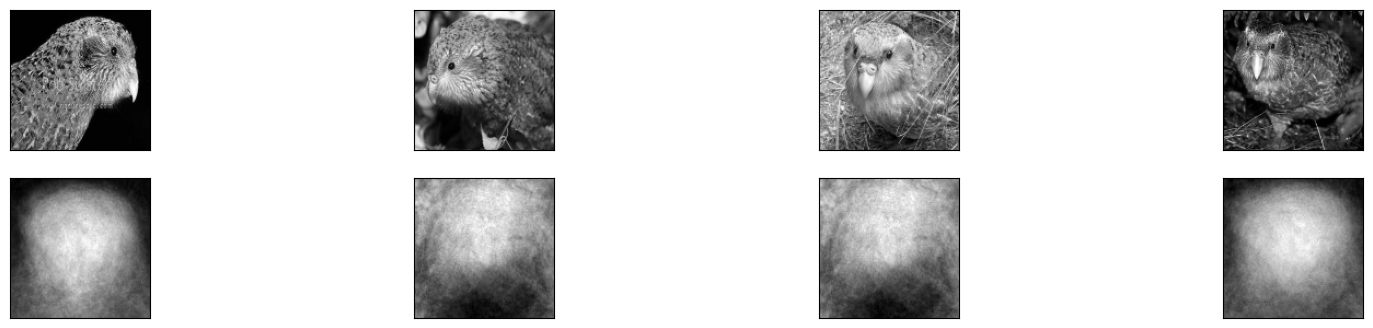

In [112]:
# 4c
encoding_dim = 32

input_img = Input(shape=(images[0].shape[0],))
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(images[0].shape[0], activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[-5]
decoder_layer2 = autoencoder.layers[-4]
decoder_layer3 = autoencoder.layers[-3]
decoder_layer4 = autoencoder.layers[-2]
decoder_layer5 = autoencoder.layers[-1]

decoder = Model(encoded_input,  (decoder_layer5(decoder_layer4(decoder_layer3(decoder_layer2(decoder_layer1(encoded_input)))))))


autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(images, images,
                epochs=20,
                batch_size=32,
                shuffle=True,
                validation_data=(test_images, test_images))

encoded_imgs = encoder.predict(test_images)
decoded_imgs = decoder.predict(encoded_imgs)

n = 4
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(image_size, image_size))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(image_size, image_size))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

The best performing autoencoder for mnist dataset above is used to classify grayscale images of kakapo parrots. 20 epochs and 5 hidden layers. The correct image is on top and the predicted images are on the bottum. The autoencoder does not perform well for this dataset. The performance however is to be expected. MNIST handwritten digits are very simple structure when compared to a kakapo parrot. Moreover, there are 60,000 images to train for mnist, this dataset only contains 154 images to train on the kakapo parrot. Also the hidden layers are only dense layers. Connvolution layers are much better performing than dense layers for image classification. Moreover, the same hidden layer values were used but in the mnist case flattened images are of size 784 but these images are 16384 so there could me more hidden layers and the hidden layers could have been larger. Auto encoders are able to use many different types of layers not just dense. For future work an autoencoder such as this may benefit from densenets and inception layers. DenseNets are convolution layers that are fully connected with each other. It is more computationally expensive but can result in better feature extraction. Inception layers can be used to dynamically adjust the kernel size since in images such as these the parrots are not always fully centered and are not a consistent size in frame, so dynamically adjusting the kernel size for feature extraction can be benefiicial. Transfer learning can be used since the dataset is very small. Alternativly or in addition to this more data can be generated by performing operations such as rotations or noise to the images using ImageDataGenerator() or similar methods. These methods were not used in this context in order to demonstrate how a model that performs well on 1 dataset can be very poorly performing on other dataset due to factors such as those described above.